In [110]:
import numpy as np
import pandas as pd
from datetime import datetime
import calendar
from geopy.distance import distance
import seaborn as sns
%matplotlib inline

In [111]:
data = {
    'av': pd.read_csv('data/air_visit_data.csv'),
    'as': pd.read_csv('data/air_store_info.csv'),
    'hs': pd.read_csv('data/hpg_store_info.csv'),
    'ar': pd.read_csv('data/air_reserve.csv'),
    'hr': pd.read_csv('data/hpg_reserve.csv'),
    'sr': pd.read_csv('data/store_id_relation.csv'),
    'ss': pd.read_csv('data/sample_submission.csv'),
    'di': pd.read_csv('data/date_info.csv', parse_dates=True).rename(columns={'calendar_date':'visit_date'})
    }

### Prepare air_store_info

In [112]:
data['as'].head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [113]:
data['as']['air_genre_name'].unique()

array(['Italian/French', 'Dining bar', 'Yakiniku/Korean food',
       'Cafe/Sweets', 'Izakaya', 'Okonomiyaki/Monja/Teppanyaki',
       'Bar/Cocktail', 'Japanese food', 'Creative cuisine', 'Other',
       'Western food', 'International cuisine', 'Asian', 'Karaoke/Party'], dtype=object)

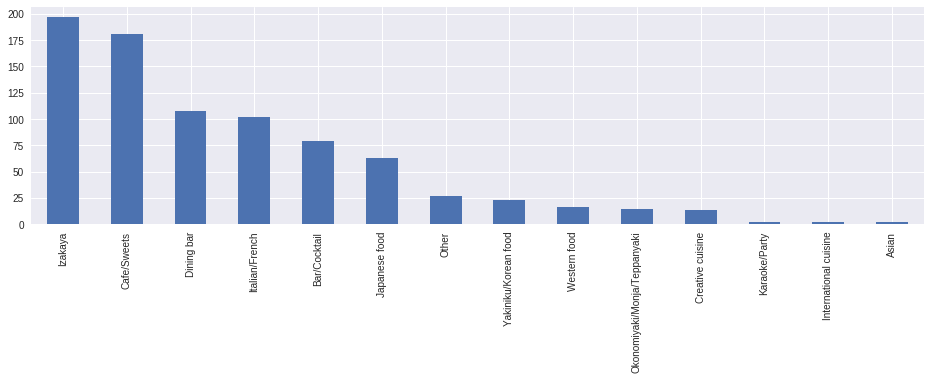

In [114]:
data['as']['air_genre_name'].value_counts().plot(kind='bar', figsize=(16,4))

In [115]:
air_genre_map = {
    'Italian/French':1,
    'Dining bar':2,
    'Yakiniku/Korean food':3,
    'Cafe/Sweets':4,
    'Izakaya':5,
    'Okonomiyaki/Monja/Teppanyaki':5,
    'Bar/Cocktail':6,
    'Japanese food':7,
    'Creative cuisine':7,
    'Other':8,
    'Western food':9,
    'International cuisine':10,
    'Asian':11,
    'Karaoke/Party':12
}

In [116]:
data['as']['genre_code'] = data['as']['air_genre_name'].map(air_genre_map)

In [117]:
print data['as']['genre_code'].unique()
print len(data['as']['genre_code'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
12


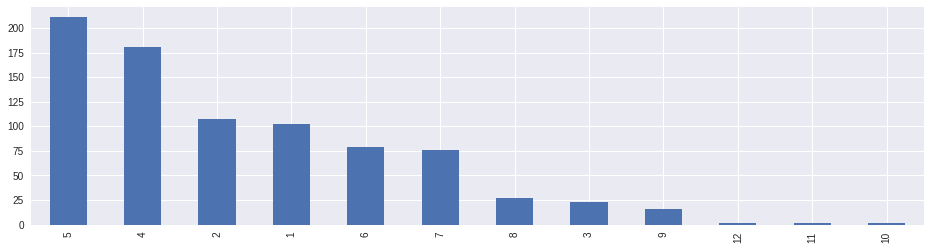

In [118]:
data['as']['genre_code'].value_counts().plot(kind='bar', figsize=(16,4))

In [119]:
data['as'].head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,genre_code
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,1
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,1
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,1
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,1
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1


In [120]:
len(data['as']['air_area_name'].unique())

103

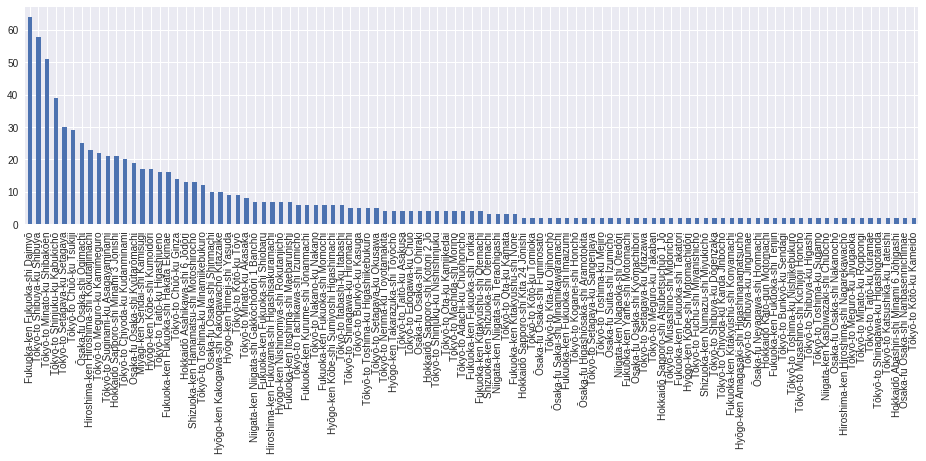

In [121]:
data['as']['air_area_name'].value_counts().plot(kind='bar', figsize=(16,4))

In [122]:
data['as']['prefecture'] = data['as'].apply(lambda row: row['air_area_name'].split()[0], axis=1)
len(data['as']['prefecture'].unique())

9

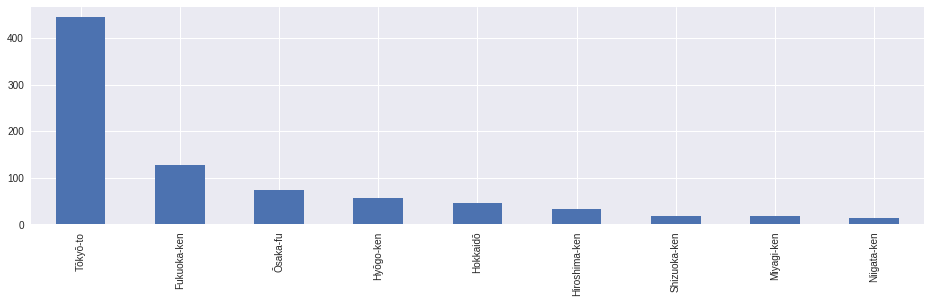

In [123]:
data['as']['prefecture'].value_counts().plot(kind='bar', figsize=(16,4))

In [124]:
data['as']['air_area_3'] = data['as'].apply(lambda row: row['air_area_name'].split()[2], axis=1)
len(data['as']['air_area_3'].unique())

99

In [125]:
data['as']['prefecture'].unique()

array(['Hy\xc5\x8dgo-ken', 'T\xc5\x8dky\xc5\x8d-to', 'Fukuoka-ken',
       '\xc5\x8csaka-fu', 'Hiroshima-ken', 'Shizuoka-ken',
       'Hokkaid\xc5\x8d', 'Miyagi-ken', 'Niigata-ken'], dtype=object)

In [126]:
air_prefecture_map = {
    'Hy\xc5\x8dgo-ken': 1,
    'T\xc5\x8dky\xc5\x8d-to': 2,
    'Fukuoka-ken': 3,
    '\xc5\x8csaka-fu': 4,
    'Hiroshima-ken': 5, 
    'Shizuoka-ken': 6,
    'Hokkaid\xc5\x8d': 7,
    'Miyagi-ken': 8,
    'Niigata-ken': 9
}

In [127]:
data['as']['prefecture_code'] = data['as']['prefecture'].map(air_prefecture_map)

In [128]:
data['as'].head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,genre_code,prefecture,air_area_3,prefecture_code
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,1,Hyōgo-ken,Kumoidōri,1
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,1,Hyōgo-ken,Kumoidōri,1
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,1,Hyōgo-ken,Kumoidōri,1
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,1,Hyōgo-ken,Kumoidōri,1
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,1,Tōkyō-to,Shibakōen,2


### Prepare hpg_store_info

In [129]:
data['hs'].head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [130]:
data['hs']['hpg_genre_name'].unique()

array(['Japanese style', 'Italian', 'International cuisine',
       'Grilled meat', 'Creation', 'Shabu-shabu/Sukiyaki',
       'Korean cuisine', 'Creative Japanese food',
       'Japanese cuisine/Kaiseki', 'Seafood', 'Japanese food in general',
       'Party', 'Okonomiyaki/Monja/Teppanyaki', 'Sushi',
       'Spain Bar/Italian Bar', 'Chinese general', 'Bistro', 'French',
       'Karaoke', 'Pasta/Pizza', 'Cafe', 'Sweets', 'Steak/Hamburger/Curry',
       'Thai/Vietnamese food', 'Western food',
       'Taiwanese/Hong Kong cuisine', 'Cantonese food', 'Bar/Cocktail',
       'Dim Sum/Dumplings', 'Amusement bar', 'Sichuan food',
       'Shanghai food', 'Spain/Mediterranean cuisine', 'Udon/Soba'], dtype=object)

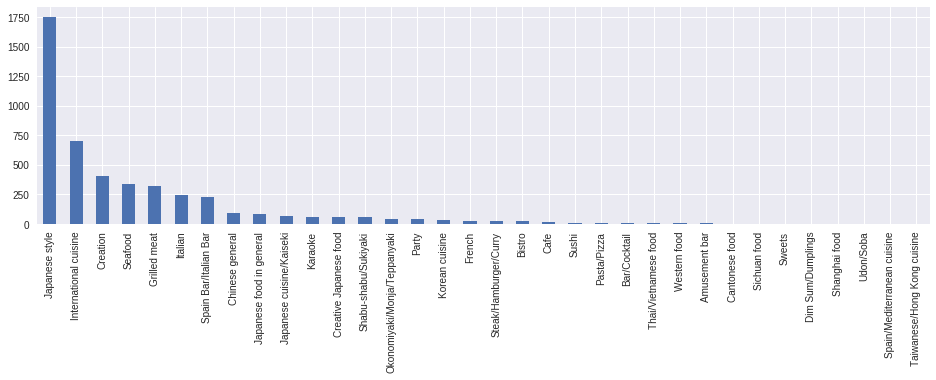

In [131]:
data['hs']['hpg_genre_name'].value_counts().plot(kind='bar', figsize=(16,4))

In [132]:
hpg_genre_map = {
    'Japanese style':7,
    'Italian':1,
    'International cuisine':10,
    'Grilled meat': 8,
    'Creation': 7,
    'Shabu-shabu/Sukiyaki': 7,
    'Korean cuisine': 3,
    'Creative Japanese food': 7,
    'Japanese cuisine/Kaiseki': 7,
    'Seafood': 8,
    'Japanese food in general': 7,
    'Party': 12,
    'Okonomiyaki/Monja/Teppanyaki': 5,
    'Sushi': 7,
    'Spain Bar/Italian Bar': 1,
    'Chinese general': 11,
    'Bistro': 2,
    'French': 1,
    'Karaoke': 12,
    'Pasta/Pizza': 1,
    'Cafe': 4,
    'Sweets': 4,
    'Steak/Hamburger/Curry': 9,
    'Thai/Vietnamese food': 11,
    'Western food': 9,
    'Taiwanese/Hong Kong cuisine': 11,
    'Cantonese food': 11,
    'Bar/Cocktail': 6,
    'Dim Sum/Dumplings': 11,
    'Amusement bar': 6,
    'Sichuan food': 11,
    'Shanghai food': 11,
    'Spain/Mediterranean cuisine': 1,
    'Udon/Soba': 7
}

In [133]:
data['hs']['genre_code'] = data['hs']['hpg_genre_name'].map(hpg_genre_map)
print data['as']['genre_code'].unique()
print len(data['as']['genre_code'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
12


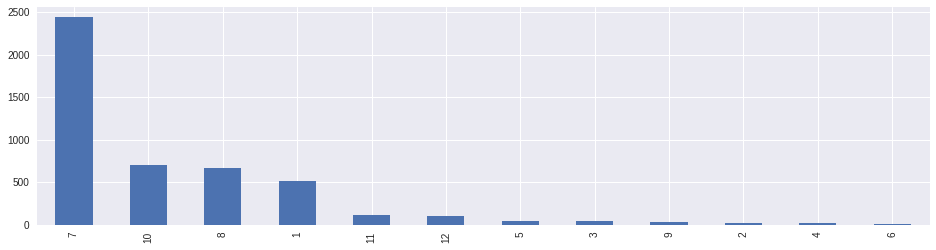

In [134]:
data['hs']['genre_code'].value_counts().plot(kind='bar', figsize=(16,4))

In [135]:
data['hs']['prefecture'] = data['hs'].apply(lambda row: row['hpg_area_name'].split()[0], axis=1)
len(data['hs']['prefecture'].unique())

13

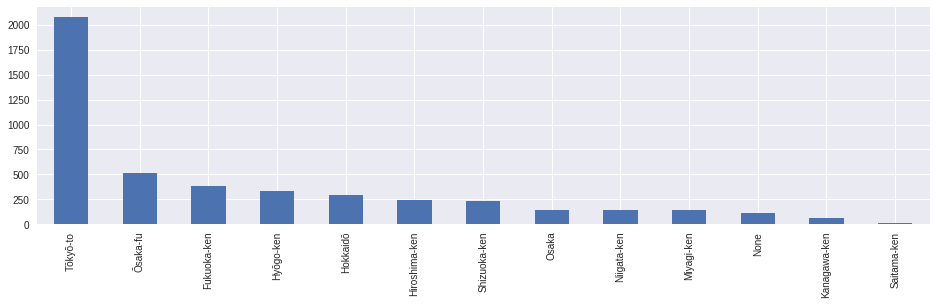

In [136]:
data['hs']['prefecture'].value_counts().plot(kind='bar', figsize=(16,4))

In [137]:
data['hs']['prefecture'].unique()

array(['T\xc5\x8dky\xc5\x8d-to', 'Hy\xc5\x8dgo-ken', 'Fukuoka-ken',
       'Hiroshima-ken', '\xc5\x8csaka-fu', 'Shizuoka-ken', 'None',
       'Kanagawa-ken', 'Hokkaid\xc5\x8d', 'Miyagi-ken', 'Niigata-ken',
       'Osaka', 'Saitama-ken'], dtype=object)

In [138]:
hpg_prefecture_map = {
    'T\xc5\x8dky\xc5\x8d-to': 2,
    'Hy\xc5\x8dgo-ken': 1,
    'Fukuoka-ken': 3,
    'Hiroshima-ken': 5,
    '\xc5\x8csaka-fu': 4,
    'Shizuoka-ken': 6,
    'None': 10,
    'Kanagawa-ken': 11,
    'Hokkaid\xc5\x8d': 7,
    'Miyagi-ken': 8,
    'Niigata-ken': 9,
    'Osaka': 4,
    'Saitama-ken': 12 
}

In [139]:
data['hs']['prefecture_code'] = data['hs']['prefecture'].map(hpg_prefecture_map)

In [140]:
data['hs'].head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude,genre_code,prefecture,prefecture_code
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,7,Tōkyō-to,2
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,7,Tōkyō-to,2
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,7,Tōkyō-to,2
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,7,Tōkyō-to,2
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221,7,Tōkyō-to,2


### Merging store_info and geolocation

In [141]:
data['si'] = data['as'][['air_store_id', 'genre_code', 'prefecture_code', 'latitude', 'longitude']].append(data['hs'][['hpg_store_id', 'genre_code', 'prefecture_code', 'latitude', 'longitude']], ignore_index=True).fillna('0')

In [142]:
data['si'].head()

,air_store_id,genre_code,hpg_store_id,latitude,longitude,prefecture_code
0,air_0f0cdeee6c9bf3d7,1,0,34.695124,135.197852,1
1,air_7cc17a324ae5c7dc,1,0,34.695124,135.197852,1
2,air_fee8dcf4d619598e,1,0,34.695124,135.197852,1
3,air_a17f0778617c76e2,1,0,34.695124,135.197852,1
4,air_83db5aff8f50478e,1,0,35.658068,139.751599,2


In [143]:
len(data['si'].index.values)

5519

In [144]:
data['si'][827:831][:]

,air_store_id,genre_code,hpg_store_id,latitude,longitude,prefecture_code
827,air_7514d90009613cd6,12,0,43.055460,141.340956,7
828,air_c8fe396d6c46275d,12,0,43.055460,141.340956,7
829,0,7,hpg_6622b62385aec8bf,35.643675,139.668221,2
830,0,7,hpg_e9e068dd49c5fa00,35.643675,139.668221,2


In [145]:
hpg_store_ids_from_relation = list(data['sr']['hpg_store_id'].unique())
len(hpg_store_ids_from_relation)

150

In [146]:
data['si'] = data['si'][data['si'].apply(lambda row: row['hpg_store_id'] not in hpg_store_ids_from_relation, axis=1)]
len(data['si'].index.values)

5456

In [147]:
nearest_count_all_map = {}
nearest_count_genre_map = {}

In [148]:
def calc_nearest_count(latitude, longitude, genre=None, delta=2):    
    p1 = (latitude, longitude)
    p1g = (latitude, longitude, genre)
    if genre is None and p1 in nearest_count_all_map:
        return nearest_count_all_map[p1]
    if genre is not None and p1g in nearest_count_genre_map:
        return nearest_count_genre_map[p1g]
    
    def dist_is_near(p2):
        return distance(p1, p2).kilometers < delta
    
    def genre_is_same(gen):
        return gen == genre if genre is not None else True           
    
    df = data['si'][data['si'].apply(
        lambda row: dist_is_near((row['latitude'], 
                                  row['longitude'])) and genre_is_same(row['genre_code']), axis=1)]
    result = len(df.index) - 1
    
    if genre is None:
        nearest_count_all_map[p1] = result
    else:
        nearest_count_genre_map[p1g] = result
    
    return result

In [149]:
# def get_reservations_count_by_date_in_area(latitude, longitude, genre=None, delta=2):
#     p1 = (latitude, longitude)
#     p1g = (latitude, longitude, genre)
    
#     air_reserve = 0
#     hpg_reserve = 0
#     if visit_date in air_reservations_by_date_and_genre.index and genre in air_reservations_by_date_and_genre.loc[visit_date].index:
#         air_reserve = air_reservations_by_date_and_genre.loc[visit_date, genre]['reserve_visitors']        
    
#     if visit_date in hpg_reservations_by_date_and_genre.index and genre in hpg_reservations_by_date_and_genre.loc[visit_date].index:
#         hpg_reserve = hpg_reservations_by_date_and_genre.loc[visit_date, genre]['reserve_visitors']

In [150]:
print calc_nearest_count(35.6580681, 139.7515992)
print calc_nearest_count(35.6580681, 139.7515992, 5)
print calc_nearest_count(43.4737679144369,142.121081840925)

325
21
0


### Prepare air_reserve

In [151]:
data['ar'].head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [152]:
data['ar']['visit_datetime'] = pd.to_datetime(data['ar']['visit_datetime'])
data['ar']['visit_date'] = pd.to_datetime(data['ar']['visit_datetime'].dt.date)
data['ar']['visit_dow'] = data['ar']['visit_datetime'].dt.dayofweek
data['ar']['reserve_datetime'] = pd.to_datetime(data['ar']['reserve_datetime'])
data['ar']['reserve_date'] = pd.to_datetime(data['ar']['reserve_datetime'].dt.date)
data['ar']['reserve_delta'] = (data['ar']['visit_datetime']-data['ar']['reserve_datetime']).astype('timedelta64[h]')
data['ar'].drop(['visit_datetime', 'reserve_datetime'], inplace=True, axis=1)
data['ar'].head()

,air_store_id,reserve_visitors,visit_date,visit_dow,reserve_date,reserve_delta
0,air_877f79706adbfb06,1,2016-01-01,4,2016-01-01,3.0
1,air_db4b38ebe7a7ceff,3,2016-01-01,4,2016-01-01,0.0
2,air_db4b38ebe7a7ceff,6,2016-01-01,4,2016-01-01,0.0
3,air_877f79706adbfb06,2,2016-01-01,4,2016-01-01,4.0
4,air_db80363d35f10926,5,2016-01-01,4,2016-01-01,19.0


In [153]:
data['ar'] = pd.merge(data['ar'], 
                      data['as'][['air_store_id', 'genre_code', 'prefecture_code', 'latitude', 'longitude']], 
                      how='left', on=['air_store_id'])
data['ar'].head()

,air_store_id,reserve_visitors,visit_date,visit_dow,reserve_date,reserve_delta,genre_code,prefecture_code,latitude,longitude
0,air_877f79706adbfb06,1,2016-01-01,4,2016-01-01,3.0,7,2,35.658068,139.751599
1,air_db4b38ebe7a7ceff,3,2016-01-01,4,2016-01-01,0.0,2,4,34.676231,135.486059
2,air_db4b38ebe7a7ceff,6,2016-01-01,4,2016-01-01,0.0,2,4,34.676231,135.486059
3,air_877f79706adbfb06,2,2016-01-01,4,2016-01-01,4.0,7,2,35.658068,139.751599
4,air_db80363d35f10926,5,2016-01-01,4,2016-01-01,19.0,2,7,43.770635,142.364819


In [154]:
len(data['ar']['air_store_id'].unique())

314

In [155]:
air_reservations_by_id_and_date = data['ar'][data['ar']['reserve_delta'] > 936].groupby(['air_store_id', 'visit_date'])[['reserve_visitors']].sum()
air_reservations_by_id_and_date.head()

reserve_visitors
air_store_id         visit_date                  
air_0164b9927d20bcc3 2016-12-14                 2
                     2017-01-14                 9
                     2017-03-13                 5
                     2017-05-13                10
air_034a3d5b40d5b1b1 2017-04-08                 2

In [157]:
air_reservations_by_id_and_dow = data['ar'][data['ar']['reserve_delta'] > 936].groupby(['air_store_id', 'visit_dow'])[['reserve_visitors']].sum()
air_reservations_by_id_and_dow.head()

reserve_visitors
air_store_id         visit_dow                  
air_0164b9927d20bcc3 0                         5
                     2                         2
                     5                        19
air_034a3d5b40d5b1b1 5                         2
air_03963426c9312048 0                        33

In [158]:
air_reservations_by_id_and_date.loc['air_0164b9927d20bcc3', '2016-12-14']['reserve_visitors']

2

In [159]:
air_reservations_by_date = data['ar'][data['ar']['reserve_delta'] > 936].groupby(['visit_date'])[['reserve_visitors']].sum()
air_reservations_by_date.head()

,reserve_visitors
visit_date,
2016-02-13,2
2016-02-15,4
2016-02-17,2
2016-02-20,26
2016-02-21,11


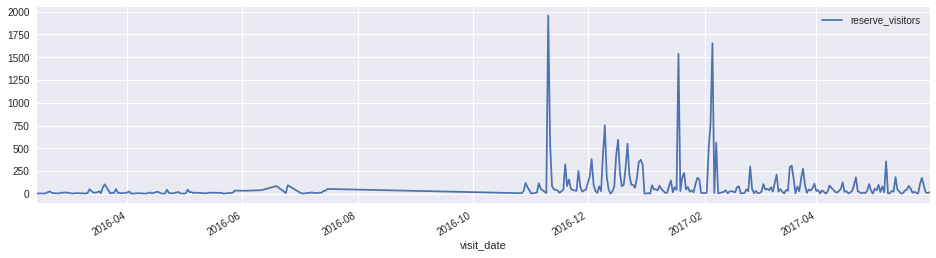

In [160]:
air_reservations_by_date.plot(figsize=(16,4))

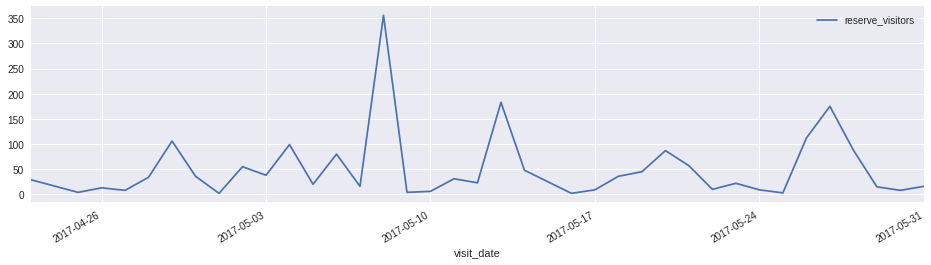

In [161]:
air_reservations_by_date['2017-04-23':].plot(figsize=(16,4))

In [162]:
air_reservations_by_date_and_genre = data['ar'][data['ar']['reserve_delta'] > 936].groupby(['visit_date', 'genre_code'])[['reserve_visitors']].sum()
air_reservations_by_date_and_genre.head()

reserve_visitors
visit_date genre_code                  
2016-02-13 7                          2
2016-02-15 7                          4
2016-02-17 7                          2
2016-02-20 2                         20
           5                          6

### Prepare hpg_reserve

In [163]:
data['hr'].head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [164]:
data['hr']['visit_datetime'] = pd.to_datetime(data['hr']['visit_datetime'])
data['hr']['visit_date'] = pd.to_datetime(data['hr']['visit_datetime'].dt.date)
data['hr']['visit_dow'] = data['hr']['visit_datetime'].dt.dayofweek
data['hr']['reserve_datetime'] = pd.to_datetime(data['hr']['reserve_datetime'])
data['hr']['reserve_date'] = pd.to_datetime(data['hr']['reserve_datetime'].dt.date)
data['hr']['reserve_delta'] = (data['hr']['visit_datetime']-data['hr']['reserve_datetime']).astype('timedelta64[h]')
data['hr'].drop(['visit_datetime', 'reserve_datetime'], inplace=True, axis=1)
data['hr'].head()

,hpg_store_id,reserve_visitors,visit_date,visit_dow,reserve_date,reserve_delta
0,hpg_c63f6f42e088e50f,1,2016-01-01,4,2016-01-01,2.0
1,hpg_dac72789163a3f47,3,2016-01-01,4,2016-01-01,7.0
2,hpg_c8e24dcf51ca1eb5,2,2016-01-01,4,2016-01-01,2.0
3,hpg_24bb207e5fd49d4a,5,2016-01-01,4,2016-01-01,6.0
4,hpg_25291c542ebb3bc2,13,2016-01-01,4,2016-01-01,14.0


In [165]:
data['hr'] = pd.merge(data['hr'], 
                      data['hs'][['hpg_store_id', 'genre_code', 'prefecture_code', 'latitude', 'longitude']], 
                      how='left', on=['hpg_store_id'])

data['hr'].head()

,hpg_store_id,reserve_visitors,visit_date,visit_dow,reserve_date,reserve_delta,genre_code,prefecture_code,latitude,longitude
0,hpg_c63f6f42e088e50f,1,2016-01-01,4,2016-01-01,2.0,NaN,NaN,NaN,NaN
1,hpg_dac72789163a3f47,3,2016-01-01,4,2016-01-01,7.0,1.0,1.0,34.692109,135.191698
2,hpg_c8e24dcf51ca1eb5,2,2016-01-01,4,2016-01-01,2.0,NaN,NaN,NaN,NaN
3,hpg_24bb207e5fd49d4a,5,2016-01-01,4,2016-01-01,6.0,NaN,NaN,NaN,NaN
4,hpg_25291c542ebb3bc2,13,2016-01-01,4,2016-01-01,14.0,NaN,NaN,NaN,NaN


In [166]:
data['hr']['genre_code'] = data['hr']['genre_code'].fillna('0') 
data['hr']['prefecture_code'] = data['hr']['prefecture_code'].fillna('0') 
data['hr']['genre_code'] = data['hr']['genre_code'].astype('int64') 
data['hr']['prefecture_code'] = data['hr']['prefecture_code'].astype('int64') 

In [167]:
data['hr'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000320 entries, 0 to 2000319
Data columns (total 10 columns):
hpg_store_id        object
reserve_visitors    int64
visit_date          datetime64[ns]
visit_dow           int64
reserve_date        datetime64[ns]
reserve_delta       float64
genre_code          int64
prefecture_code     int64
latitude            float64
longitude           float64
dtypes: datetime64[ns](2), float64(3), int64(4), object(1)
memory usage: 167.9+ MB


In [168]:
print len(data['hr']['hpg_store_id'].unique())
print len(data['hs']['hpg_store_id'].unique())

13325
4690


In [169]:
hpg_reservations_by_id_and_date = data['hr'][data['hr']['reserve_delta'] > 936].groupby(['hpg_store_id', 'visit_date'])[['reserve_visitors']].sum()
hpg_reservations_by_id_and_date.head()

reserve_visitors
hpg_store_id         visit_date                  
hpg_001ce40a1f873e4f 2016-02-27                 8
                     2017-01-14                 7
hpg_001f8de5120ce935 2016-12-08                12
hpg_0025da1a9a15ce7a 2017-01-27                15
                     2017-04-15                 2

In [170]:
hpg_reservations_by_id_and_dow = data['hr'][data['hr']['reserve_delta'] > 936].groupby(['hpg_store_id', 'visit_dow'])[['reserve_visitors']].sum()
hpg_reservations_by_id_and_dow.head()

reserve_visitors
hpg_store_id         visit_dow                  
hpg_001ce40a1f873e4f 5                        15
hpg_001f8de5120ce935 3                        12
hpg_0025da1a9a15ce7a 4                        15
                     5                         2
hpg_0034f74a25be3cbe 6                         8

In [171]:
hpg_reservations_by_date = data['hr'][data['hr']['reserve_delta'] > 936].groupby(['visit_date'])[['reserve_visitors']].sum()
hpg_reservations_by_date.head()

,reserve_visitors
visit_date,
2016-02-12,29
2016-02-13,74
2016-02-14,14
2016-02-15,6
2016-02-16,16


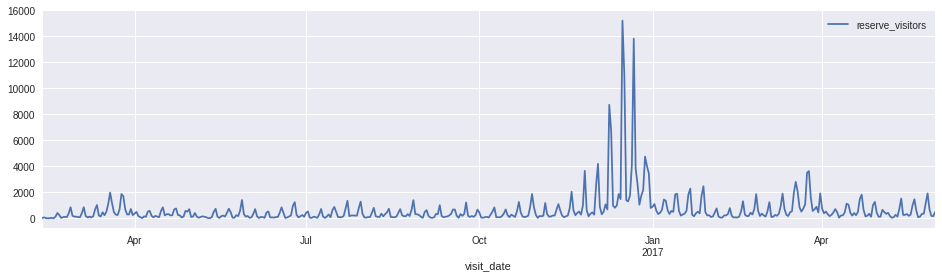

In [172]:
hpg_reservations_by_date.plot(figsize=(16,4))

In [173]:
hpg_reservations_by_date_and_genre = data['hr'][data['hr']['reserve_delta'] > 936].groupby(['visit_date', 'genre_code'])[['reserve_visitors']].sum()
hpg_reservations_by_date_and_genre.head()

reserve_visitors
visit_date genre_code                  
2016-02-12 0                          7
           10                         2
           12                        20
2016-02-13 0                         40
           6                         20

### Merging air and hpg reservations

In [174]:
hpg_id = data['sr'][data['sr']['air_store_id'] == 'air_375a5241615b5e22']['hpg_store_id']
len(hpg_id.values)
#d = pd.to_datetime('2016-01-29')
#hpg_reservations_by_dates.loc[hpg_id]['reserve_visitors']

1

In [175]:
def get_reservations_count_by_id_and_date(store_id, visit_date):
    air_reserve = 0
    hpg_reserve = 0
    if store_id in air_reservations_by_id_and_date.index and visit_date in air_reservations_by_id_and_date.loc[store_id].index:
        air_reserve = air_reservations_by_id_and_date.loc[store_id, visit_date]['reserve_visitors']
    
    hpg_ids = data['sr'][data['sr']['air_store_id'] == store_id]['hpg_store_id'].values
    hpg_id = hpg_ids[0] if len(hpg_ids) > 0 else None
    
    if hpg_id is not None and hpg_id in hpg_reservations_by_id_and_date.index and visit_date in hpg_reservations_by_id_and_date.loc[hpg_id].index:
        hpg_reserve = hpg_reservations_by_id_and_date.loc[hpg_id, visit_date]['reserve_visitors']
        
    return air_reserve + hpg_reserve

In [176]:
def get_reservations_count_by_id_and_dow(store_id, visit_dow):
    air_reserve = 0
    hpg_reserve = 0
    if store_id in air_reservations_by_id_and_dow.index and visit_dow in air_reservations_by_id_and_dow.loc[store_id].index:
        air_reserve = air_reservations_by_id_and_dow.loc[store_id, visit_dow]['reserve_visitors']
    
    hpg_ids = data['sr'][data['sr']['air_store_id'] == store_id]['hpg_store_id'].values
    hpg_id = hpg_ids[0] if len(hpg_ids) > 0 else None
    
    if hpg_id is not None and hpg_id in air_reservations_by_id_and_dow.index and visit_dow in air_reservations_by_id_and_dow.loc[hpg_id].index:
        hpg_reserve = air_reservations_by_id_and_dow.loc[hpg_id, visit_dow]['reserve_visitors']
        
    return air_reserve + hpg_reserve

In [177]:
def get_reservations_count_by_date(visit_date):
    air_reserve = 0
    hpg_reserve = 0
    if visit_date in air_reservations_by_date.index:
        air_reserve = air_reservations_by_date.loc[visit_date]['reserve_visitors']        
    
    if visit_date in hpg_reservations_by_date.index:
        hpg_reserve = hpg_reservations_by_date.loc[visit_date]['reserve_visitors']
        
    return air_reserve + hpg_reserve

In [178]:
def get_reservations_count_by_date_and_genre(visit_date, genre):
    air_reserve = 0
    hpg_reserve = 0
    if visit_date in air_reservations_by_date_and_genre.index and genre in air_reservations_by_date_and_genre.loc[visit_date].index:
        air_reserve = air_reservations_by_date_and_genre.loc[visit_date, genre]['reserve_visitors']        
    
    if visit_date in hpg_reservations_by_date_and_genre.index and genre in hpg_reservations_by_date_and_genre.loc[visit_date].index:
        hpg_reserve = hpg_reservations_by_date_and_genre.loc[visit_date, genre]['reserve_visitors']
        
    return air_reserve + hpg_reserve

### Prepare date_info

In [179]:
data['di'].head()

,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [180]:
data['di']['visit_date'] = pd.to_datetime(data['di']['visit_date'])
#data['di'].set_index(['visit_date'], inplace=True)
#data['di'].index.name = None
data['di'].day_of_week = data['di'].day_of_week.apply(list(calendar.day_name).index)
data['di'].head()

,visit_date,day_of_week,holiday_flg
0,2016-01-01,4,1
1,2016-01-02,5,1
2,2016-01-03,6,1
3,2016-01-04,0,0
4,2016-01-05,1,0


### Prepare air_visit_data

In [182]:
#data['av'] = pd.read_csv('data/air_visit_data.csv')
data['av'].head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [183]:
data['av']['visit_date'] = pd.to_datetime(data['av']['visit_date'])
data['av'] = pd.merge(data['av'], data['di'], how='left', on=['visit_date'])
data['av']['month'] = data['av']['visit_date'].dt.month
data['av'].head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,month
0,air_ba937bf13d40fb24,2016-01-13,25,2,0,1
1,air_ba937bf13d40fb24,2016-01-14,32,3,0,1
2,air_ba937bf13d40fb24,2016-01-15,29,4,0,1
3,air_ba937bf13d40fb24,2016-01-16,22,5,0,1
4,air_ba937bf13d40fb24,2016-01-18,6,0,0,1


In [184]:
data['av'] = pd.merge(data['av'], 
                      data['as'][['air_store_id', 'genre_code', 'prefecture_code', 'latitude', 'longitude']], 
                      how='left', on=['air_store_id'])
data['av'].head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,month,genre_code,prefecture_code,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25,2,0,1,2,2,35.658068,139.751599
1,air_ba937bf13d40fb24,2016-01-14,32,3,0,1,2,2,35.658068,139.751599
2,air_ba937bf13d40fb24,2016-01-15,29,4,0,1,2,2,35.658068,139.751599
3,air_ba937bf13d40fb24,2016-01-16,22,5,0,1,2,2,35.658068,139.751599
4,air_ba937bf13d40fb24,2016-01-18,6,0,0,1,2,2,35.658068,139.751599


In [193]:
visits_by_id_and_dow_min = data['av'].groupby(['air_store_id', 'day_of_week'])[['visitors']].min()
visits_by_id_and_dow_mean = data['av'].groupby(['air_store_id', 'day_of_week'])[['visitors']].mean()
visits_by_id_and_dow_median = data['av'].groupby(['air_store_id', 'day_of_week'])[['visitors']].median()
visits_by_id_and_dow_max = data['av'].groupby(['air_store_id', 'day_of_week'])[['visitors']].max()
visits_by_id_and_dow_min.head()

visitors
air_store_id         day_of_week          
air_00a91d42b08b08d9 0                   1
                     1                   1
                     2                  15
                     3                  15
                     4                  17

In [217]:
def get_visits_stats(store_id, dow, stats='min'):
    res = 0
    gb = visits_by_id_and_dow_min
    if stats == 'mean':
        gb = visits_by_id_and_dow_mean
    elif stats == 'median':
        gb = visits_by_id_and_dow_median
    elif stats == 'max':
        gb = visits_by_id_and_dow_max
    
    if store_id in gb.index and dow in gb.loc[store_id].index:
        res = gb.loc[store_id, dow]['visitors']    
        
    return res

In [185]:
data['av']['rest_in_area_all'] = data['av'].apply(
    lambda row: calc_nearest_count(row['latitude'], row['longitude']), axis=1)

In [186]:
data['av']['rest_in_area_genre'] = data['av'].apply(
    lambda row: calc_nearest_count(row['latitude'], row['longitude'], row['genre_code']), axis=1)

In [187]:
data['av']['reservations_here'] = data['av'].apply(
    lambda row: get_reservations_count_by_id_and_date(row['air_store_id'], row['visit_date']), axis=1)

In [189]:
data['av']['reservations_dow'] = data['av'].apply(
    lambda row: get_reservations_count_by_id_and_dow(row['air_store_id'], row['day_of_week']), axis=1)

In [190]:
data['av']['reservations_total'] = data['av'].apply(
    lambda row: get_reservations_count_by_date(row['visit_date']), axis=1)

In [191]:
data['av']['reservations_total_genre'] = data['av'].apply(
    lambda row: get_reservations_count_by_date_and_genre(row['visit_date'], row['genre_code']), axis=1)

In [199]:
data['av']['visits_dow_min'] = data['av'].apply(
    lambda row: get_visits_stats(row['air_store_id'], row['day_of_week'], 'min'), axis=1)

In [200]:
data['av']['visits_dow_mean'] = data['av'].apply(
    lambda row: get_visits_stats(row['air_store_id'], row['day_of_week'], 'mean'), axis=1)

In [201]:
data['av']['visits_dow_median'] = data['av'].apply(
    lambda row: get_visits_stats(row['air_store_id'], row['day_of_week'], 'median'), axis=1)

In [204]:
data['av']['visits_dow_max'] = data['av'].apply(
    lambda row: get_visits_stats(row['air_store_id'], row['day_of_week'], 'mфx'), axis=1)

In [ ]:
# data['av']['reservations_in_area_all'] = data['av'].apply(
#     lambda row: get_reservations_count_by_date_in_area(row['latitude'], row['longitude']), axis=1)

In [ ]:
# data['av']['reservations_in_area_genre'] = data['av'].apply(
#     lambda row: get_reservations_count_by_date_in_area(row['latitude'], row['longitude'], row['genre_code']), axis=1)

In [205]:
data['av'].head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,month,genre_code,prefecture_code,latitude,longitude,rest_in_area_all,rest_in_area_genre,reservations_here,reservations_dow,reservations_total,reservations_total_genre,visits_dow_min,visits_dow_mean,visits_dow_median,visits_dow_max
0,air_ba937bf13d40fb24,2016-01-13,25,2,0,1,2,2,35.658068,139.751599,325,9,0,0,0,0,7,23.843750,25.0,57
1,air_ba937bf13d40fb24,2016-01-14,32,3,0,1,2,2,35.658068,139.751599,325,9,0,0,0,0,2,20.292308,21.0,54
2,air_ba937bf13d40fb24,2016-01-15,29,4,0,1,2,2,35.658068,139.751599,325,9,0,0,0,0,4,34.738462,35.0,61
3,air_ba937bf13d40fb24,2016-01-16,22,5,0,1,2,2,35.658068,139.751599,325,9,0,0,0,0,6,27.651515,27.0,53
4,air_ba937bf13d40fb24,2016-01-18,6,0,0,1,2,2,35.658068,139.751599,325,9,0,0,0,0,2,13.754386,12.0,34


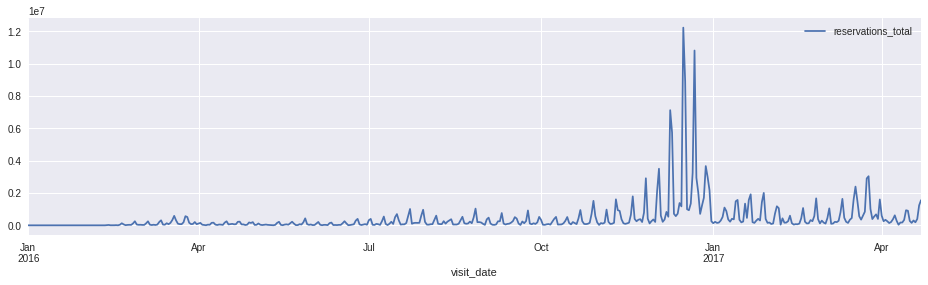

In [206]:
data['av'].groupby(['visit_date'])[['reservations_total']].sum().plot(figsize=(16,4))

### Prepare submission data

In [231]:
data['ss'] = pd.read_csv('data/sample_submission.csv')
data['ss'].head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [232]:
data['ss']['air_store_id'] = data['ss'].apply(lambda row: row.loc['id'][:row.loc['id'].rindex('_')], axis=1)
data['ss']['visit_date'] = data['ss'].apply(lambda row: row.loc['id'][row.loc['id'].rindex('_')+1:], axis=1)
data['ss']['visit_date'] = pd.to_datetime(data['ss']['visit_date'])
data['ss'].head()

,id,visitors,air_store_id,visit_date
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27


In [233]:
data['ss'] = pd.merge(data['ss'], data['di'], how='left', on=['visit_date'])
data['ss']['month'] = data['ss']['visit_date'].dt.month
data['ss'].head()

,id,visitors,air_store_id,visit_date,day_of_week,holiday_flg,month
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23,6,0,4
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24,0,0,4
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25,1,0,4
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26,2,0,4
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27,3,0,4


In [234]:
data['ss'] = pd.merge(data['ss'], 
                      data['as'][['air_store_id', 'genre_code', 'prefecture_code', 'latitude', 'longitude']], 
                      how='left', on=['air_store_id'])
data['ss'].head()

,id,visitors,air_store_id,visit_date,day_of_week,holiday_flg,month,genre_code,prefecture_code,latitude,longitude
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23,6,0,4,1,2,35.694003,139.753595
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24,0,0,4,1,2,35.694003,139.753595
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25,1,0,4,1,2,35.694003,139.753595
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26,2,0,4,1,2,35.694003,139.753595
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27,3,0,4,1,2,35.694003,139.753595


In [235]:
data['ss']['rest_in_area_all'] = data['ss'].apply(
    lambda row: calc_nearest_count(row['latitude'], row['longitude']), axis=1)

In [236]:
data['ss']['rest_in_area_genre'] = data['ss'].apply(
    lambda row: calc_nearest_count(row['latitude'], row['longitude'], row['genre_code']), axis=1)

In [237]:
data['ss']['reservations_here'] = data['ss'].apply(
    lambda row: get_reservations_count_by_id_and_date(row['air_store_id'], row['visit_date']), axis=1)

In [238]:
data['ss']['reservations_dow'] = data['ss'].apply(
    lambda row: get_reservations_count_by_id_and_dow(row['air_store_id'], row['day_of_week']), axis=1)

In [239]:
data['ss']['reservations_total'] = data['ss'].apply(
    lambda row: get_reservations_count_by_date(row['visit_date']), axis=1)

In [240]:
data['ss']['reservations_total_genre'] = data['ss'].apply(
    lambda row: get_reservations_count_by_date_and_genre(row['visit_date'], row['genre_code']), axis=1)

In [241]:
data['ss']['visits_dow_min'] = data['ss'].apply(
    lambda row: get_visits_stats(row['air_store_id'], row['day_of_week'], 'min'), axis=1)

In [242]:
data['ss']['visits_dow_mean'] = data['ss'].apply(
    lambda row: get_visits_stats(row['air_store_id'], row['day_of_week'], 'mean'), axis=1)

In [243]:
data['ss']['visits_dow_median'] = data['ss'].apply(
    lambda row: get_visits_stats(row['air_store_id'], row['day_of_week'], 'median'), axis=1)

In [244]:
data['ss']['visits_dow_max'] = data['ss'].apply(
    lambda row: get_visits_stats(row['air_store_id'], row['day_of_week'], 'max'), axis=1)

In [245]:
data['ss'].head()

,id,visitors,air_store_id,visit_date,day_of_week,holiday_flg,month,genre_code,prefecture_code,latitude,...,rest_in_area_all,rest_in_area_genre,reservations_here,reservations_dow,reservations_total,reservations_total_genre,visits_dow_min,visits_dow_mean,visits_dow_median,visits_dow_max
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23,6,0,4,1,2,35.694003,...,167,19,0,0,691,31,2,2.000000,2.0,2
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24,0,0,4,1,2,35.694003,...,167,19,0,0,149,0,1,22.457143,19.0,47
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25,1,0,4,1,2,35.694003,...,167,19,0,0,207,5,1,24.350000,24.5,43
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26,2,0,4,1,2,35.694003,...,167,19,0,0,365,0,15,28.125000,28.0,52
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27,3,0,4,1,2,35.694003,...,167,19,0,0,130,0,15,29.868421,30.0,47


### Preparing numerical features and saving dataframes

In [246]:
# df = pd.get_dummies(d1.append(d2), columns=['day_of_week', 'month', 'genre_code', 'prefecture_code'])
# df.head()

In [247]:
# train_df = df[:len(d1.index)][:]
# test_df = df[len(d1.index):][:]
train_df = data['av']
test_df = data['ss']

In [248]:
train_df = train_df.fillna(-1)
test_df = test_df.fillna(-1)

In [249]:
for c, dtype in zip(train_df.columns, train_df.dtypes):
    if dtype == np.float64:
        train_df[c] = train_df[c].astype(np.float32)

In [250]:
for c, dtype in zip(test_df.columns, test_df.dtypes):
    if dtype == np.float64:
        test_df[c] = test_df[c].astype(np.float32)

In [251]:
train_df.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,month,genre_code,prefecture_code,latitude,longitude,rest_in_area_all,rest_in_area_genre,reservations_here,reservations_dow,reservations_total,reservations_total_genre,visits_dow_min,visits_dow_mean,visits_dow_median,visits_dow_max
0,air_ba937bf13d40fb24,2016-01-13,25,2,0,1,2,2,35.65807,139.751602,325,9,0,0,0,0,7,23.843750,25.0,57
1,air_ba937bf13d40fb24,2016-01-14,32,3,0,1,2,2,35.65807,139.751602,325,9,0,0,0,0,2,20.292307,21.0,54
2,air_ba937bf13d40fb24,2016-01-15,29,4,0,1,2,2,35.65807,139.751602,325,9,0,0,0,0,4,34.738461,35.0,61
3,air_ba937bf13d40fb24,2016-01-16,22,5,0,1,2,2,35.65807,139.751602,325,9,0,0,0,0,6,27.651516,27.0,53
4,air_ba937bf13d40fb24,2016-01-18,6,0,0,1,2,2,35.65807,139.751602,325,9,0,0,0,0,2,13.754386,12.0,34


In [252]:
test_df.head()

,id,visitors,air_store_id,visit_date,day_of_week,holiday_flg,month,genre_code,prefecture_code,latitude,...,rest_in_area_all,rest_in_area_genre,reservations_here,reservations_dow,reservations_total,reservations_total_genre,visits_dow_min,visits_dow_mean,visits_dow_median,visits_dow_max
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23,6,0,4,1,2,35.694004,...,167,19,0,0,691,31,2,2.000000,2.0,2
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24,0,0,4,1,2,35.694004,...,167,19,0,0,149,0,1,22.457144,19.0,47
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25,1,0,4,1,2,35.694004,...,167,19,0,0,207,5,1,24.350000,24.5,43
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26,2,0,4,1,2,35.694004,...,167,19,0,0,365,0,15,28.125000,28.0,52
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27,3,0,4,1,2,35.694004,...,167,19,0,0,130,0,15,29.868422,30.0,47


In [253]:
train_df.to_csv('data/train_df.csv', index=False)
test_df.to_csv('data/test_df.csv', index=False)

# Training

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
import joblib
from time import time

import xgboost as xgb
%matplotlib inline

In [2]:
def RMSLE(estimator, X_test, y_test):
    y_pred =  estimator.predict(X_test)
    return -1*(mean_squared_log_error(y_test, y_pred)**0.5)

In [3]:
def read_data():
    train_df = pd.read_csv('data/train_df.csv', parse_dates=['visit_date'])
    test_df = pd.read_csv('data/test_df.csv', parse_dates=['visit_date'])
    submission_df = pd.read_csv('data/sample_submission.csv')
    
    return (train_df, test_df, submission_df)

In [4]:
train_df = pd.read_csv('data/train_df.csv', parse_dates=['visit_date'])
train_df.columns

Index([u'holiday_flg', u'reservations_here', u'reservations_total',
       u'reservations_total_genre', u'rest_in_area_all', u'rest_in_area_genre',
       u'visit_date', u'visitors', u'day_of_week_0', u'day_of_week_1',
       u'day_of_week_2', u'day_of_week_3', u'day_of_week_4', u'day_of_week_5',
       u'day_of_week_6', u'month_1', u'month_2', u'month_3', u'month_4',
       u'month_5', u'month_6', u'month_7', u'month_8', u'month_9', u'month_10',
       u'month_11', u'month_12', u'genre_code_1', u'genre_code_2',
       u'genre_code_3', u'genre_code_4', u'genre_code_5', u'genre_code_6',
       u'genre_code_7', u'genre_code_8', u'genre_code_9', u'genre_code_10',
       u'genre_code_11', u'genre_code_12', u'prefecture_code_1',
       u'prefecture_code_2', u'prefecture_code_3', u'prefecture_code_4',
       u'prefecture_code_5', u'prefecture_code_6', u'prefecture_code_7',
       u'prefecture_code_8', u'prefecture_code_9'],
      dtype='object')

In [22]:
def prepare_data(train_df, test_df):
    features_to_remove=[]
    #train_df = train_df[train_df['visit_date'] >= '2016-07-01']
    features_to_remove = [#'reservations_here', 'reservations_total', 'reservations_total_genre',
#                           'prefecture_code_1', 'prefecture_code_2', 'prefecture_code_3', 'prefecture_code_4',
#                           'prefecture_code_5', 'prefecture_code_6', 'prefecture_code_7', 'prefecture_code_8', 
#                           'prefecture_code_9',
#                           'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 
#                           'month_7', 'month_8', 'month_9', 'month_10','month_11','month_12',
#                           'genre_code_1', 'genre_code_2', 'genre_code_3', 'genre_code_4', 'genre_code_5', 
#                           'genre_code_6', 'genre_code_7', 'genre_code_8', 'genre_code_9', 'genre_code_10',
#                           'genre_code_11', 'genre_code_12'
    ]
    train_df.drop(features_to_remove, inplace=True, axis=1)
    test_df.drop(features_to_remove, inplace=True, axis=1)
    
    #y_train = np.log1p(train_df['visitors'].values)
    y_train = train_df['visitors'].values
    X_train = train_df.drop(['visitors', 'visit_date'], axis=1).values
    X_test = test_df.drop(['visitors', 'visit_date'], axis=1).values
    
    return (X_train, y_train, X_test)

In [23]:
def predict(predictor, X_train, y_train, X_test, submission_df):
    print X_train.shape
    predictor.fit(X_train, y_train)      
    y_test = predictor.predict(X_test)
    #y_test = np.expm1(y_test)    
    
    timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
    filepath_prediction = 'prediction/prediction-%s.csv' % timestamp
    filepath_model = 'model/model-%s.pkl' % (timestamp)
    #joblib.dump(predictor, filepath_model) 

    print 'Prediction saved to %s' % filepath_prediction
    submission_df['visitors'] = y_test        
    submission_df.to_csv(filepath_prediction, index=False, columns=['id', 'visitors'])
    
    return y_test

In [15]:
def visualize(train_df, test_df, y_test):
    test_df['visitors'] = y_test
    ts_train = train_df.groupby(['visit_date'])[['visitors']].sum()
    ts_pred = test_df.groupby(['visit_date'])[['visitors']].sum()
    plt.rcParams["figure.figsize"] = (16,4)
    plt.plot(ts_train)
    plt.plot(ts_pred)
    plt.show()
    
    ts_train = train_df[:391][['visit_date', 'visitors']].set_index('visit_date')
    ts_pred = test_df[23361:23399][['visit_date', 'visitors']].set_index('visit_date')
    plt.plot(ts_train)
    plt.plot(ts_pred)
    plt.show()

In [10]:
def do_grid_search(pipeline, parameters, X_train, y_train):
    grid_search = GridSearchCV(pipeline, parameters, scoring=RMSLE)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print "done in %0.3fs" % (time() - t0)    
    print("Best score: %.4f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    return grid_search

In [11]:
def do_experiment(get_pipeline_and_params):
    train_df, test_df, submission_df = read_data()
    X_train, y_train, X_test = prepare_data(train_df, test_df)
    pipeline, parameters = get_pipeline_and_params()
    gs = do_grid_search(pipeline, parameters, X_train, y_train)
    y_test = predict(gs.best_estimator_, X_train, y_train, X_test, submission_df)
    visualize(train_df, test_df, y_test)

### Linear Regression

In [16]:
def get_pipeline_and_params_lr():    
    pipeline = Pipeline([
        ('lr', LinearRegression()),       
    ])
    parameters = {        
    }
    return pipeline, parameters

done in 0.905s
Best score: -0.2320
Best parameters set:
(252108, 46)
Prediction saved to prediction/prediction-2018-01-07-01-05-30.csv


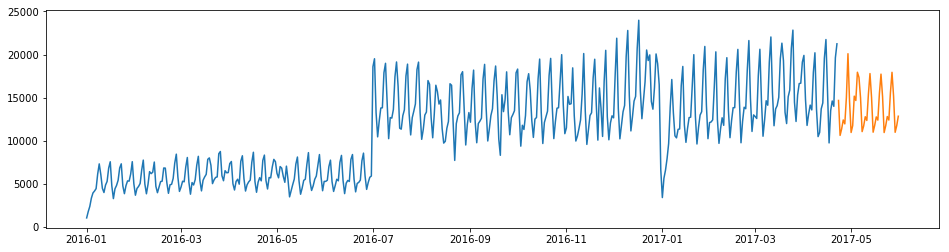

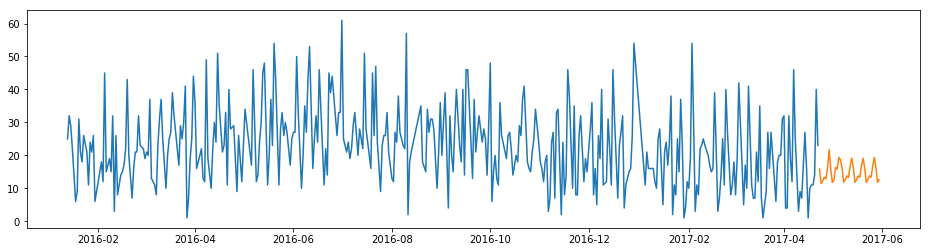

In [17]:
do_experiment(get_pipeline_and_params_lr)

### SGDRegressor

In [ ]:
def get_pipeline_and_params_sgd():    
    pipeline = Pipeline([
        ('sgd', SGDRegressor()),       
    ])
    parameters = {     
        #'sgd__penalty': ['none', 'l2', 'l1', 'elasticnet'],        
    }
    return pipeline, parameters

In [ ]:
do_experiment(get_pipeline_and_params_sgd)

### Random Forest

In [ ]:
def get_pipeline_and_params_rf1():    
    pipeline = Pipeline([
        ('rf', RandomForestRegressor()),       
    ])
    parameters = {        
        'rf__n_estimators': np.arange(10, 100, 20),
        'rf__max_features': ['auto', 'sqrt', 'log2']
    }
    return pipeline, parameters

In [32]:
def get_pipeline_and_params_rf2():    
    pipeline = Pipeline([
        ('rf', RandomForestRegressor()),       
    ])
    parameters = {        
        'rf__n_estimators': [200],
        'rf__max_features': ['sqrt']
    }
    return pipeline, parameters

In [ ]:
do_experiment(get_pipeline_and_params_rf1)

In [ ]:
do_experiment(get_pipeline_and_params_rf2)

done in 183.582s
Best score: -0.8913
Best parameters set:
	rf__max_features: 'sqrt'
	rf__n_estimators: 200
(252108, 46)
Prediction saved to prediction/prediction-2018-01-07-01-27-59.csv


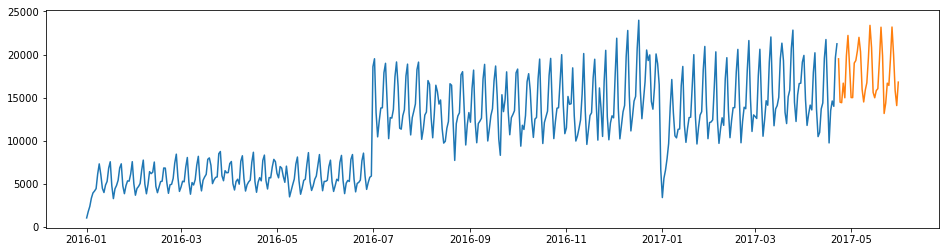

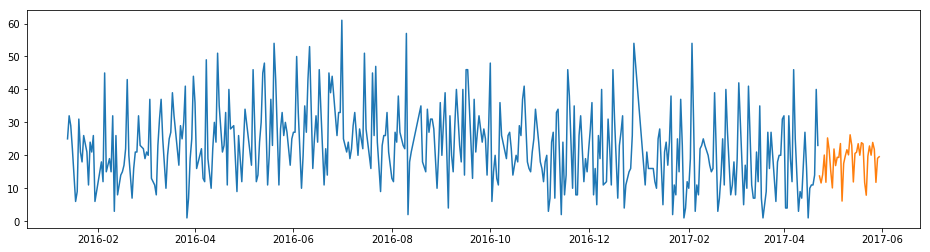

In [33]:
do_experiment(get_pipeline_and_params_rf2)

### XGBoost

In [26]:
def get_pipeline_and_params_xgb():    
    pipeline = Pipeline([
        ('xgb', xgb.XGBRegressor()),       
    ])
    parameters = {                
        'xgb__max_depth':[8],
        'xgb__learning_rate':[0.05],
        'xgb__n_estimators':[100],
        'xgb__objective':['reg:linear'],
        'xgb__gamma': [0],
        'xgb__min_child_weight':[1],
        'xgb__subsample':[1],
        'xgb__colsample_bytree':[1],
        'xgb__scale_pos_weight':[1],
        'xgb__seed':[27],
    }
    return pipeline, parameters

done in 128.574s
Best score: -0.8336
Best parameters set:
	xgb__colsample_bytree: 1
	xgb__gamma: 0
	xgb__learning_rate: 0.05
	xgb__max_depth: 8
	xgb__min_child_weight: 1
	xgb__n_estimators: 100
	xgb__objective: 'reg:linear'
	xgb__scale_pos_weight: 1
	xgb__seed: 27
	xgb__subsample: 1
(252108, 46)
Prediction saved to prediction/prediction-2018-01-07-01-17-41.csv


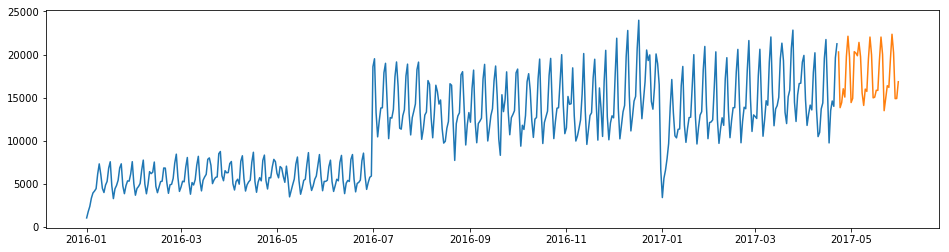

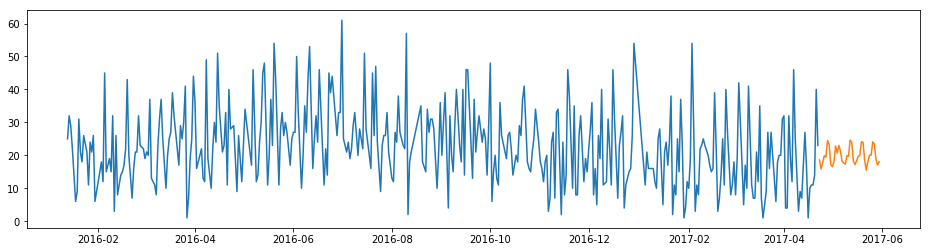

In [27]:
do_experiment(get_pipeline_and_params_xgb)

### SVM

In [ ]:
def get_pipeline_and_params_svr():    
    pipeline = Pipeline([
        ('svr', SVR()),       
    ])
    parameters = {                 
    }
    return pipeline, parameters

In [ ]:
do_experiment(get_pipeline_and_params_svr)

### GradientBoostingRegressor

In [28]:
def get_pipeline_and_params_gbr():    
    pipeline = Pipeline([
        ('gbr', GradientBoostingRegressor()),       
    ])
    parameters = {   
        'gbr__learning_rate': [0.2]
    }
    return pipeline, parameters

done in 89.809s
Best score: -0.8330
Best parameters set:
	gbr__learning_rate: 0.2
(252108, 46)
Prediction saved to prediction/prediction-2018-01-07-01-19-32.csv


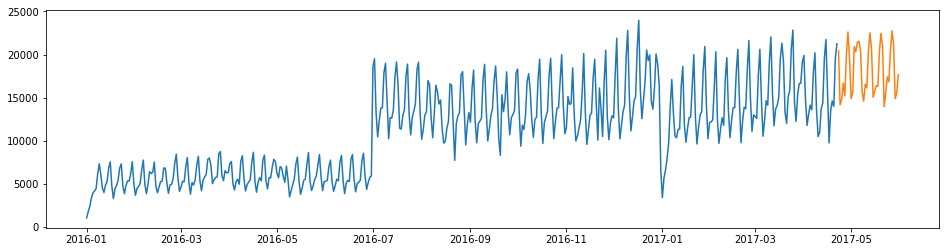

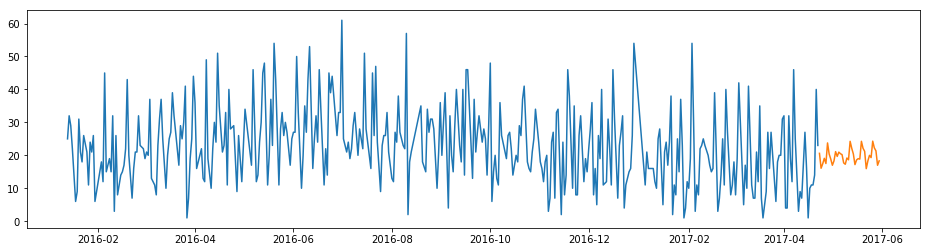

In [29]:
do_experiment(get_pipeline_and_params_gbr)

### KNeighborsRegressor

In [30]:
def get_pipeline_and_params_knn():    
    pipeline = Pipeline([
        ('knn', KNeighborsRegressor()),       
    ])
    parameters = {   
        'knn__n_neighbors': [5]
    }
    return pipeline, parameters

done in 39.365s
Best score: -0.8834
Best parameters set:
	knn__n_neighbors: 5
(252108, 46)
Prediction saved to prediction/prediction-2018-01-07-01-21-20.csv


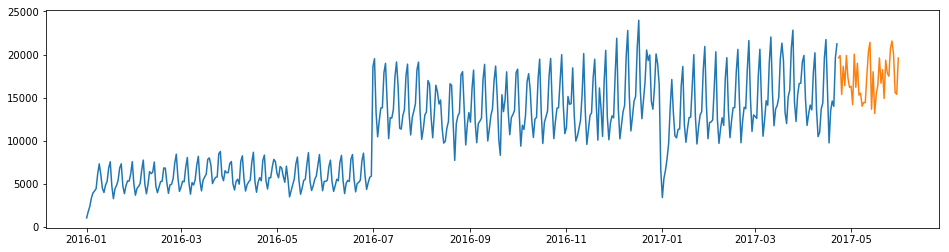

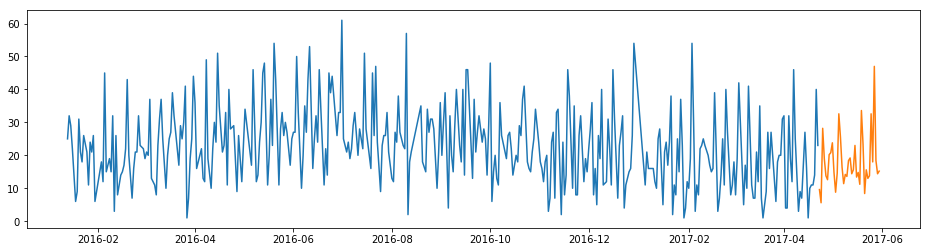

In [31]:
do_experiment(get_pipeline_and_params_knn)

### Another XGBoost (with GPU)

In [ ]:
train_df = pd.read_csv('data/train_df.csv', parse_dates=['visit_date'])
test_df = pd.read_csv('data/test_df.csv', parse_dates=['visit_date'])

train_x = train_df.drop(['air_store_id', 'visit_date', 'visitors'], axis=1)
train_y = np.log1p(train_df['visitors'].values)
print(train_x.shape, train_y.shape)
test_x = test_df.drop(['id', 'air_store_id', 'visit_date', 'visitors'], axis=1)

#boost_params = {'eval_metric': 'rmse'} #, 'gpu_id':0, 'tree_method':'gpu_hist'}
xgb0 = xgb.XGBRegressor(
    max_depth=8,
    learning_rate=0.01,
    n_estimators=10000,
    objective='reg:linear',
    gamma=0,
    min_child_weight=1,
    subsample=1,
    colsample_bytree=1,
    scale_pos_weight=1,
    seed=27,
    eval_metric='rmse',
    tree_method='gpu_hist',
    predictor ='gpu_predictor',    
    gpu_id=0
)
    #**boost_params)

t0 = time()
xgb0.fit(train_x, train_y)
print("done in %0.3fs" % (time() - t0))
predict_y = xgb0.predict(test_x)
test_df['visitors'] = np.expm1(predict_y)
timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
filepath_prediction = 'prediction/prediction-%s.csv' % timestamp
test_df[['id', 'visitors']].to_csv(filepath_prediction, index=False, float_format='%.3f')  # LB0.495
print('Prediction saved to %s' % filepath_prediction)
visualize(train_df, test_df)